In [1]:
###Import dictionaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
###Import data set
data_df = pd.read_csv("C:/Users/admin/Downloads/gym_members_exercise_tracking.csv")
pd.set_option('display.max_columns', None)
print ('sample bộ data_set')
print ( data_df.head() ) ## method head() lấy giá trị của 5 dòng đầu tiên của tập dữ liệu

sample bộ data_set
   Age  Gender  Weight (kg)  Height (m)  Avg_BPM  Session_Duration (hours)  \
0   56    Male         88.3        1.71      157                      1.69   
1   46  Female         74.9        1.53      151                      1.30   
2   32  Female         68.1        1.66      122                      1.11   
3   25    Male         53.2        1.70      164                      0.59   
4   38    Male         46.1        1.79      158                      0.64   

  Workout_Type  Workout_Frequency (days/week)  Experience_Level  \
0         Yoga                              4                 3   
1         HIIT                              4                 2   
2       Cardio                              4                 2   
3     Strength                              3                 1   
4     Strength                              3                 1   

   Calories_Burned  
0             1313  
1              883  
2              677  
3              532  
4   

In [3]:
###Data preprocessing

###Data cleaning
data_df = data_df.drop_duplicates() ##loại bỏ những data bị trùng lặp
data_df["Workout_Type"] = data_df["Workout_Type"].str.strip() ##loại bỏ những space không cần thiết 
###nếu specific hơn cho các ký tự khác thì điền ở trong dấu ngoặc, gộp lại chung thành 1 chuỗi cái ký tự để cùng đồng thời xóa được nhiều cái

##data missing 
print('N của các biến trong tập dữ liệu')
from IPython.display import display
display(data_df.info())  ##method info() giúp xác định số giá trị của các atributes trong tập dữ liệu

N của các biến trong tập dữ liệu
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Avg_BPM                        973 non-null    int64  
 5   Session_Duration (hours)       973 non-null    float64
 6   Workout_Type                   973 non-null    object 
 7   Workout_Frequency (days/week)  973 non-null    int64  
 8   Experience_Level               973 non-null    int64  
 9   Calories_Burned                973 non-null    int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 76.1+ KB


None

In [4]:
####Data visualization

Mô tả thống kê cho tập dữ liệu


,Age,Weight (kg),Height (m),Avg_BPM,Session_Duration (hours),Workout_Frequency (days/week),Experience_Level,Calories_Burned
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,143.766701,1.256423,3.321686,1.809866,905.422405
std,12.180928,21.207500,0.12772,14.345101,0.343033,0.913047,0.739693,272.641516
min,18.000000,40.000000,1.50000,120.000000,0.500000,2.000000,1.000000,303.000000
25%,28.000000,58.100000,1.62000,131.000000,1.040000,3.000000,1.000000,720.000000
50%,40.000000,70.000000,1.71000,143.000000,1.260000,3.000000,2.000000,893.000000
75%,49.000000,86.000000,1.80000,156.000000,1.460000,4.000000,2.000000,1076.000000
max,59.000000,129.900000,2.00000,169.000000,2.000000,5.000000,3.000000,1783.000000


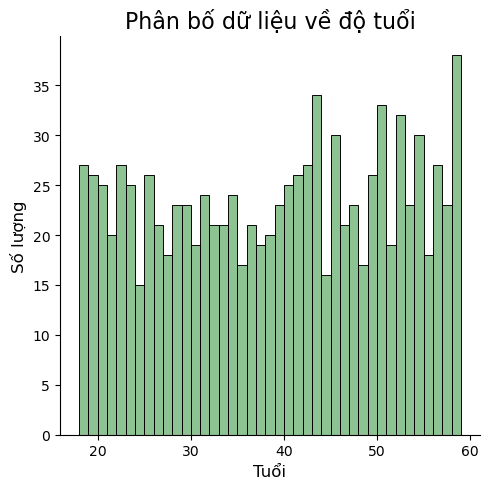

In [5]:
print('Mô tả thống kê cho tập dữ liệu')
from IPython.display import display
display(data_df.describe())

sns.displot(data_df["Age"], color= '#67AE6E', height=5, aspect=1, binwidth=1)
plt.title("Phân bố dữ liệu về độ tuổi", fontsize=16)
plt.xlabel("Tuổi", fontsize=12)
plt.ylabel("Số lượng", fontsize=12)
plt.tight_layout()
#plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_8776\3404908282.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_age = data_df.groupby('Age_Group')['Calories_Burned']


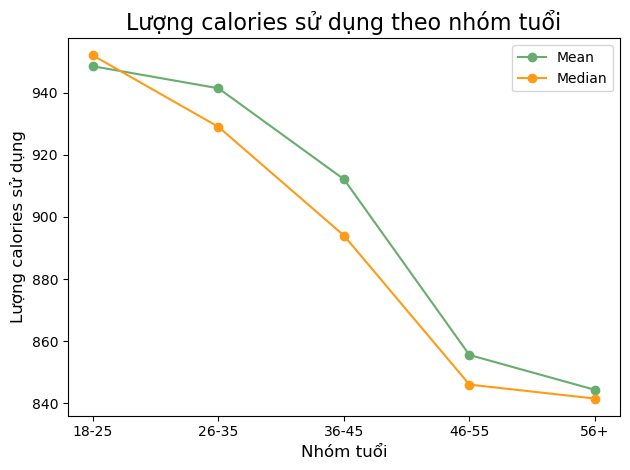

In [6]:
bins_age = [17, 25, 35, 45, 55, 100]
labels_age = ['18-25', '26-35', '36-45', '46-55', '56+']
data_df['Age_Group'] = pd.cut(data_df['Age'], bins=bins_age, labels=labels_age)
grouped_age = data_df.groupby('Age_Group')['Calories_Burned']
mean_values_age = grouped_age.mean()
median_values_age = grouped_age.median()
plt.plot(mean_values_age.index, mean_values_age.values, marker='o', label='Mean', color='#67AE6E')
plt.plot(median_values_age.index, median_values_age.values, marker='o', label='Median', color = '#FF9B17')
plt.title("Lượng calories sử dụng theo nhóm tuổi", fontsize=16)
plt.xlabel("Nhóm tuổi", fontsize=12)
plt.legend()
plt.ylabel("Lượng calories sử dụng", fontsize=12)
plt.tight_layout()
#plt.show()

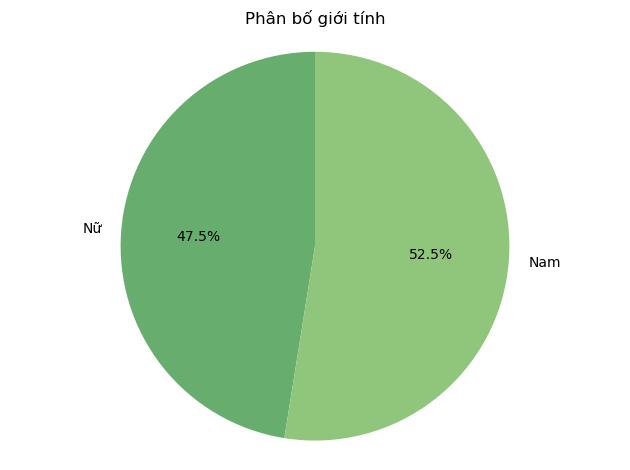

In [7]:
dem_gender = data_df['Gender'].value_counts().sum()
dem_female = (data_df['Gender'] == 'Female').sum()
female = dem_female*100/dem_gender
label_gender = ['Nữ', 'Nam']
sizes = [female, 100-female]
plt.pie(sizes, labels=label_gender,colors=['#67AE6E','#90C67C'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("Phân bố giới tính")
plt.tight_layout()
#plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_8776\1171832554.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_counts = data_df.groupby(['Calories_Group', 'Gender']).size().unstack()


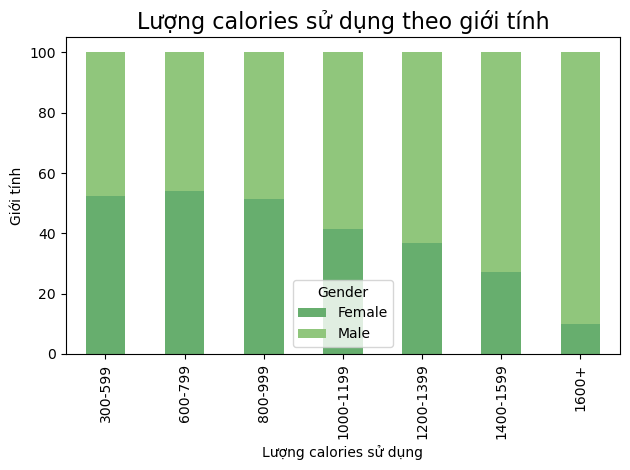

In [8]:
bins_calories = [300, 599, 799, 999, 1199, 1399, 1599,2000]
labels_calories = ['300-599', '600-799', '800-999', '1000-1199', '1200-1399', '1400-1599', '1600+']
data_df['Calories_Group'] = pd.cut(data_df['Calories_Burned'], bins=bins_calories, labels=labels_calories)
# Tạo bảng đếm số lượng từng giới tính trong mỗi nhóm
gender_counts = data_df.groupby(['Calories_Group', 'Gender']).size().unstack()
# Tính phần trăm theo hàng (mỗi nhóm cộng lại = 100%)
gender_percentage = gender_counts.div(gender_counts.sum(axis=1), axis=0) * 100
# Vẽ stacked bar chart
gender_percentage.plot(kind='bar', stacked=True, color=['#67AE6E','#90C67C'])
plt.title("Lượng calories sử dụng theo giới tính", fontsize=16)
plt.xlabel("Lượng calories sử dụng", fontsize=10)
plt.ylabel("Giới tính", fontsize=10)
plt.tight_layout()
#plt.show()

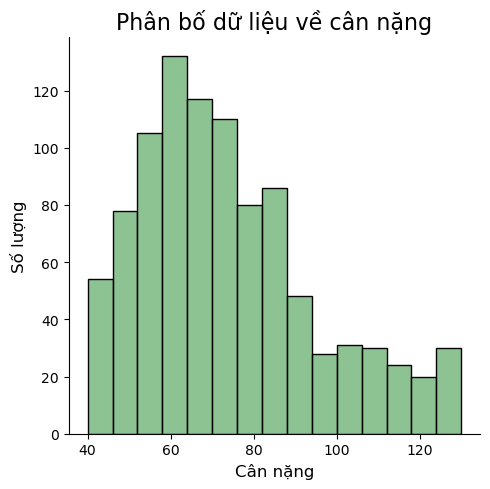

In [9]:
sns.displot(data_df["Weight (kg)"], color= '#67AE6E', height=5, aspect=1, bins=15)
plt.title("Phân bố dữ liệu về cân nặng", fontsize=16,)
plt.xlabel("Cân nặng", fontsize=12)
plt.ylabel("Số lượng", fontsize=12)
plt.tight_layout()
#plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_8776\2135584709.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_weight = data_df.groupby('Weight_Group')['Calories_Burned']


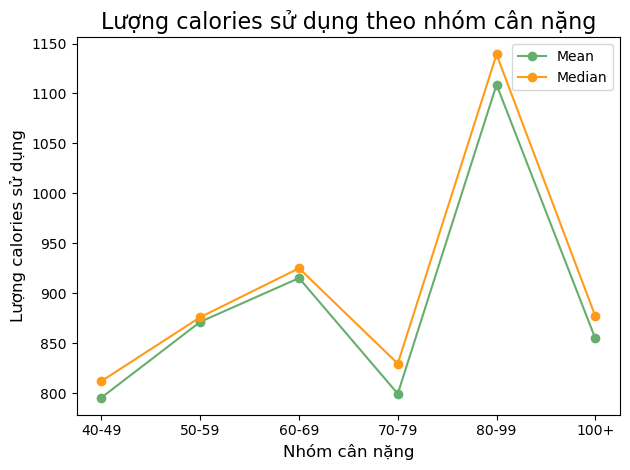

In [10]:
bins_weight = [39, 49, 59, 69, 79, 99, 200]
labels_weight = ['40-49', '50-59', '60-69', '70-79', '80-99', '100+']
data_df['Weight_Group'] = pd.cut(data_df['Weight (kg)'], bins=bins_weight, labels=labels_weight)
grouped_weight = data_df.groupby('Weight_Group')['Calories_Burned']
mean_values_weight = grouped_weight.mean()
median_values_weight = grouped_weight.median()
plt.plot(mean_values_weight.index, mean_values_weight.values, marker='o', label='Mean', color='#67AE6E')
plt.plot(median_values_weight.index, median_values_weight.values, marker='o', label='Median', color = '#FF9B17')
plt.title("Lượng calories sử dụng theo nhóm cân nặng", fontsize=16)
plt.xlabel("Nhóm cân nặng", fontsize=12)
plt.ylabel("Lượng calories sử dụng", fontsize=12)
plt.legend()
plt.tight_layout()
#plt.show()

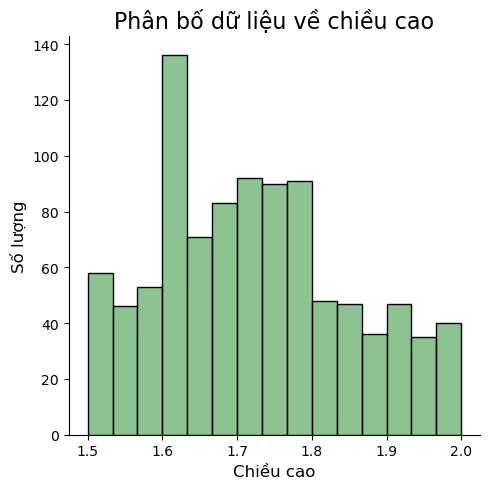

In [11]:
sns.displot(data_df["Height (m)"], color= '#67AE6E', height=5, aspect=1, bins=15)
plt.title("Phân bố dữ liệu về chiều cao", fontsize=16)
plt.xlabel("Chiều cao", fontsize=12)
plt.ylabel("Số lượng", fontsize=12)
plt.tight_layout()
#plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_8776\3809295282.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_height = data_df.groupby('Height_Group')['Calories_Burned']


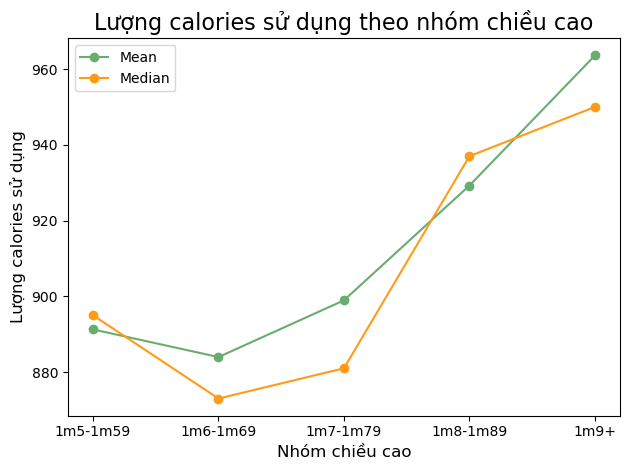

In [12]:
bins_height = [1.49, 1.59, 1.69, 1.79, 1.89, 2.5]
labels_height = ['1m5-1m59', '1m6-1m69', '1m7-1m79', '1m8-1m89', '1m9+']
data_df['Height_Group'] = pd.cut(data_df['Height (m)'], bins=bins_height, labels=labels_height)
grouped_height = data_df.groupby('Height_Group')['Calories_Burned']
mean_values_height = grouped_height.mean()
median_values_height = grouped_height.median()
plt.plot(mean_values_height.index, mean_values_height.values, marker='o', label='Mean', color='#67AE6E')
plt.plot(median_values_height.index, median_values_height.values, marker='o', label='Median', color = '#FF9B17')
plt.title("Lượng calories sử dụng theo nhóm chiều cao", fontsize=16)
plt.xlabel("Nhóm chiều cao", fontsize=12)
plt.ylabel("Lượng calories sử dụng", fontsize=12)
plt.legend()
plt.tight_layout()
#plt.show()

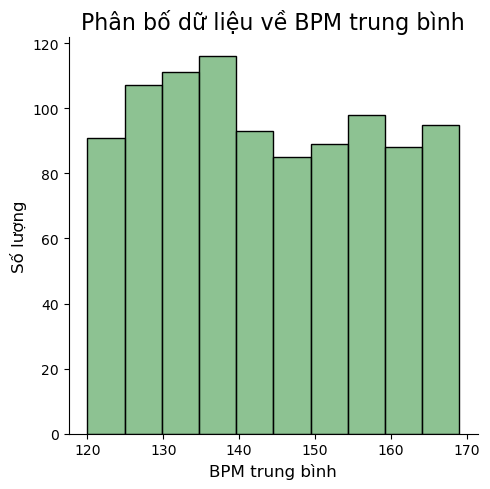

In [13]:
sns.displot(data_df["Avg_BPM"],color= '#67AE6E', height=5, aspect=1, binwidth=5)
plt.title("Phân bố dữ liệu về BPM trung bình", fontsize=16)
plt.xlabel("BPM trung bình", fontsize=12)
plt.ylabel("Số lượng", fontsize=12)
plt.tight_layout()
#plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_8776\1442419753.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_bpm = data_df.groupby('BPM_Group')['Calories_Burned']


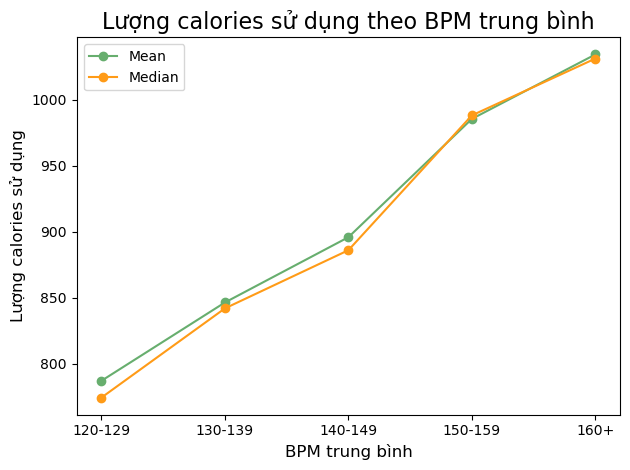

In [14]:
bins_bpm = [119, 129, 139, 149, 159, 200]
labels_bpm = ['120-129', '130-139', '140-149', '150-159', '160+']
data_df['BPM_Group'] = pd.cut(data_df['Avg_BPM'], bins=bins_bpm, labels=labels_bpm)
grouped_bpm = data_df.groupby('BPM_Group')['Calories_Burned']
mean_values_bpm = grouped_bpm.mean()
median_values_bpm = grouped_bpm.median()
plt.plot(mean_values_bpm.index, mean_values_bpm.values, marker='o', label='Mean', color='#67AE6E')
plt.plot(median_values_bpm.index, median_values_bpm.values, marker='o', label='Median', color = '#FF9B17')
plt.title("Lượng calories sử dụng theo BPM trung bình", fontsize=16)
plt.xlabel("BPM trung bình", fontsize=12)
plt.ylabel("Lượng calories sử dụng", fontsize=12)
plt.legend()
plt.tight_layout()
#plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_8776\4113977769.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_hour = data_df.groupby('Hour_Group')['Calories_Burned']


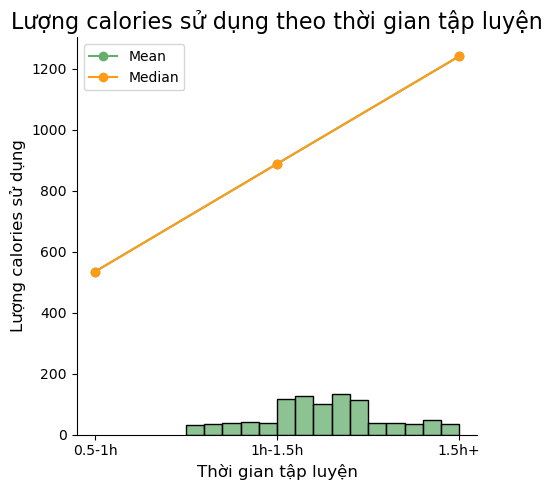

In [15]:
sns.displot(data_df["Session_Duration (hours)"],color= '#67AE6E', height=5, aspect=1, bins=15)
plt.title("Phân bố dữ liệu về thời gian tập luyện", fontsize=16)
plt.xlabel("Thời gian tập luyện", fontsize=12)
plt.ylabel("Số lượng", fontsize=12)
plt.tight_layout()
#plt.show()

bins_hour = [0.49, 0.99, 1.49, 3]
labels_hour = ['0.5-1h', '1h-1.5h', '1.5h+']
data_df['Hour_Group'] = pd.cut(data_df['Session_Duration (hours)'], bins=bins_hour, labels=labels_hour)
grouped_hour = data_df.groupby('Hour_Group')['Calories_Burned']
mean_values_hour = grouped_hour.mean()
median_values_hour = grouped_hour.median()
plt.plot(mean_values_hour.index, median_values_hour.values, marker='o', label='Mean', color='#67AE6E')
plt.plot(median_values_hour.index, median_values_hour.values, marker='o', label='Median', color = '#FF9B17')
plt.title("Lượng calories sử dụng theo thời gian tập luyện", fontsize=16)
plt.xlabel("Thời gian tập luyện", fontsize=12)
plt.ylabel("Lượng calories sử dụng", fontsize=12)
plt.legend()
plt.tight_layout()
#plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_8776\1951974498.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Workout_type_counts = data_df.groupby(['Calories_Group', 'Workout_Type']).size().unstack()


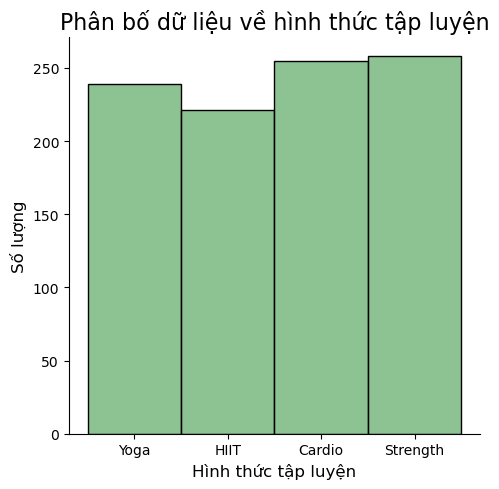

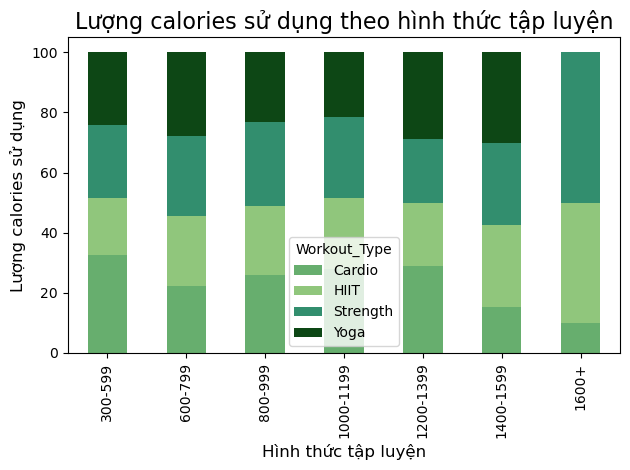

In [16]:
sns.displot(data_df["Workout_Type"],color= '#67AE6E', height=5, aspect=1, binwidth=1)
plt.title("Phân bố dữ liệu về hình thức tập luyện", fontsize=16)
plt.xlabel("Hình thức tập luyện", fontsize=12)
plt.ylabel("Số lượng", fontsize=12)
plt.tight_layout()
#plt.show()

# Tạo bảng đếm số lượng từng giới tính trong mỗi nhóm
Workout_type_counts = data_df.groupby(['Calories_Group', 'Workout_Type']).size().unstack()
# Tính phần trăm theo hàng (mỗi nhóm cộng lại = 100%)
Workout_type_percentage = Workout_type_counts.div(Workout_type_counts.sum(axis=1), axis=0) * 100
# Vẽ stacked bar chart
Workout_type_percentage.plot(kind='bar', stacked=True, color=['#67AE6E','#90C67C','#328E6E','#0D4715'])
plt.title("Lượng calories sử dụng theo hình thức tập luyện", fontsize=16)
plt.xlabel("Hình thức tập luyện", fontsize=12)
plt.ylabel("Lượng calories sử dụng", fontsize=12)
plt.tight_layout()
#plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_8776\1446388339.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Frequency_counts = data_df.groupby(['Calories_Group', 'Workout_Frequency (days/week)']).size().unstack()
C:\Users\admin\AppData\Local\Temp\ipykernel_8776\1446388339.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Exp_level_counts = data_df.groupby(['Calories_Group', 'Experience_Level']).size().unstack()


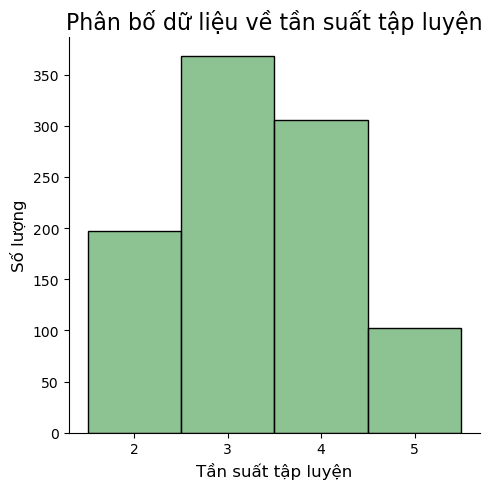

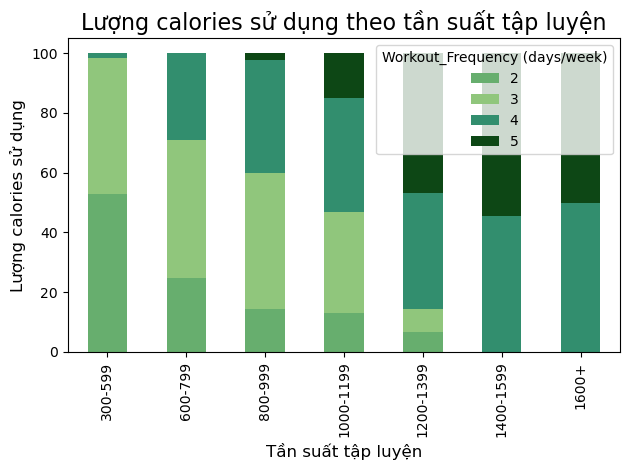

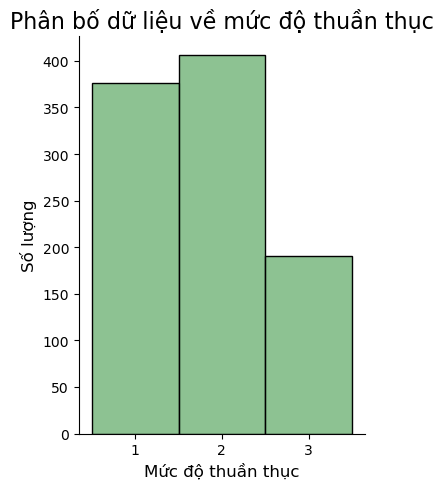

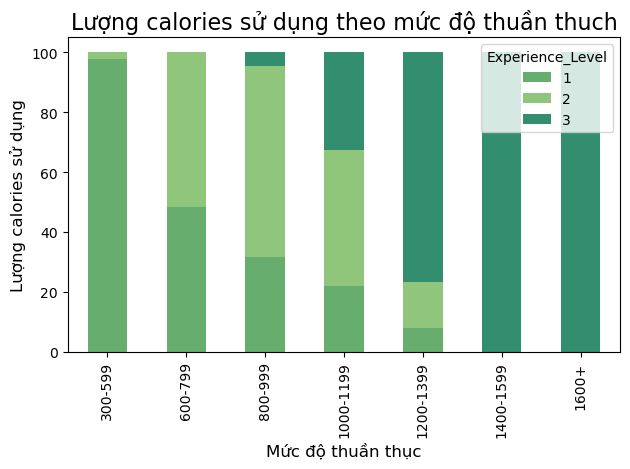

In [17]:
bins_frequency = [0.9, 1.9, 2.9, 3.9, 4.9, 5.9, 6.9, 10]
labels_frequency = ['1', '2', '3', '4', '5','6','7']
data_df['Frequency_Group'] = pd.cut(data_df['Workout_Frequency (days/week)'], bins=bins_frequency, labels=labels_frequency)
sns.displot(data_df['Frequency_Group'],color= '#67AE6E', height=5, aspect=1, binwidth=1)
plt.title("Phân bố dữ liệu về tần suất tập luyện", fontsize=16)
plt.xlabel("Tần suất tập luyện", fontsize=12)
plt.ylabel("Số lượng", fontsize=12)
plt.tight_layout()
#plt.show()

# Tạo bảng đếm số lượng từng giới tính trong mỗi nhóm
Frequency_counts = data_df.groupby(['Calories_Group', 'Workout_Frequency (days/week)']).size().unstack()
# Tính phần trăm theo hàng (mỗi nhóm cộng lại = 100%)
Frequency_percentage = Frequency_counts.div(Frequency_counts.sum(axis=1), axis=0) * 100
# Vẽ stacked bar chart
Frequency_percentage.plot(kind='bar', stacked=True, color=['#67AE6E','#90C67C','#328E6E','#0D4715'])
plt.title("Lượng calories sử dụng theo tần suất tập luyện", fontsize=16)
plt.xlabel("Tần suất tập luyện", fontsize=12)
plt.ylabel("Lượng calories sử dụng", fontsize=12)
plt.tight_layout()
#plt.show()

bins_level = [0.9, 1.9, 2.9, 5]
labels_level = ['1', '2', '3']
data_df['Level_Group'] = pd.cut(data_df['Experience_Level'], bins=bins_level, labels=labels_level)
sns.displot(data_df['Level_Group'],color= '#67AE6E', height=5, aspect=0.75, bins=3)
plt.title("Phân bố dữ liệu về mức độ thuần thục", fontsize=16)
plt.xlabel("Mức độ thuần thục", fontsize=12)
plt.ylabel("Số lượng", fontsize=12)
plt.tight_layout()
#plt.show()

# Tạo bảng đếm số lượng từng giới tính trong mỗi nhóm
Exp_level_counts = data_df.groupby(['Calories_Group', 'Experience_Level']).size().unstack()
# Tính phần trăm theo hàng (mỗi nhóm cộng lại = 100%)
Exp_level_percentage = Exp_level_counts.div(Exp_level_counts.sum(axis=1), axis=0) * 100
# Vẽ stacked bar chart
Exp_level_percentage.plot(kind='bar', stacked=True, color=['#67AE6E','#90C67C','#328E6E'])
plt.title("Lượng calories sử dụng theo mức độ thuần thuch", fontsize=16)
plt.xlabel("Mức độ thuần thục", fontsize=12)
plt.ylabel("Lượng calories sử dụng", fontsize=12)
plt.tight_layout()
#plt.show()

In [18]:
###Chạy các mô hình ML (Encode trước rồi mới chia biến)
##Data encoding
data_df = data_df.drop(data_df.columns[10:], axis=1)
print (data_df [:5])

   Age  Gender  Weight (kg)  Height (m)  Avg_BPM  Session_Duration (hours)  \
0   56    Male         88.3        1.71      157                      1.69   
1   46  Female         74.9        1.53      151                      1.30   
2   32  Female         68.1        1.66      122                      1.11   
3   25    Male         53.2        1.70      164                      0.59   
4   38    Male         46.1        1.79      158                      0.64   

  Workout_Type  Workout_Frequency (days/week)  Experience_Level  \
0         Yoga                              4                 3   
1         HIIT                              4                 2   
2       Cardio                              4                 2   
3     Strength                              3                 1   
4     Strength                              3                 1   

   Calories_Burned  
0             1313  
1              883  
2              677  
3              532  
4              556  


In [19]:
print('Mã hóa lại các biến trong mô hình')
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

data_df['Gender'] = data_df['Gender'].astype(str)
data_df['Workout_Type'] = data_df['Workout_Type'].astype(str)

categorical_columns = ['Gender', 'Workout_Type']

preprocessor = ColumnTransformer(
    transformers=[
        ('', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'  # giữ lại các cột còn lại (Age)
)
data_df= preprocessor.fit_transform(data_df)

data_df = pd.DataFrame(
    data_df,
    columns = preprocessor.get_feature_names_out()
)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

print(data_df.head())

Mã hóa lại các biến trong mô hình
   __Gender_Female  __Gender_Male  __Workout_Type_Cardio  __Workout_Type_HIIT  \
0             0.00           1.00                   0.00                 0.00   
1             1.00           0.00                   0.00                 1.00   
2             1.00           0.00                   1.00                 0.00   
3             0.00           1.00                   0.00                 0.00   
4             0.00           1.00                   0.00                 0.00   

   __Workout_Type_Strength  __Workout_Type_Yoga  remainder__Age  \
0                     0.00                 1.00           56.00   
1                     0.00                 0.00           46.00   
2                     0.00                 0.00           32.00   
3                     1.00                 0.00           25.00   
4                     1.00                 0.00           38.00   

   remainder__Weight (kg)  remainder__Height (m)  remainder__Avg_BPM  \
0   

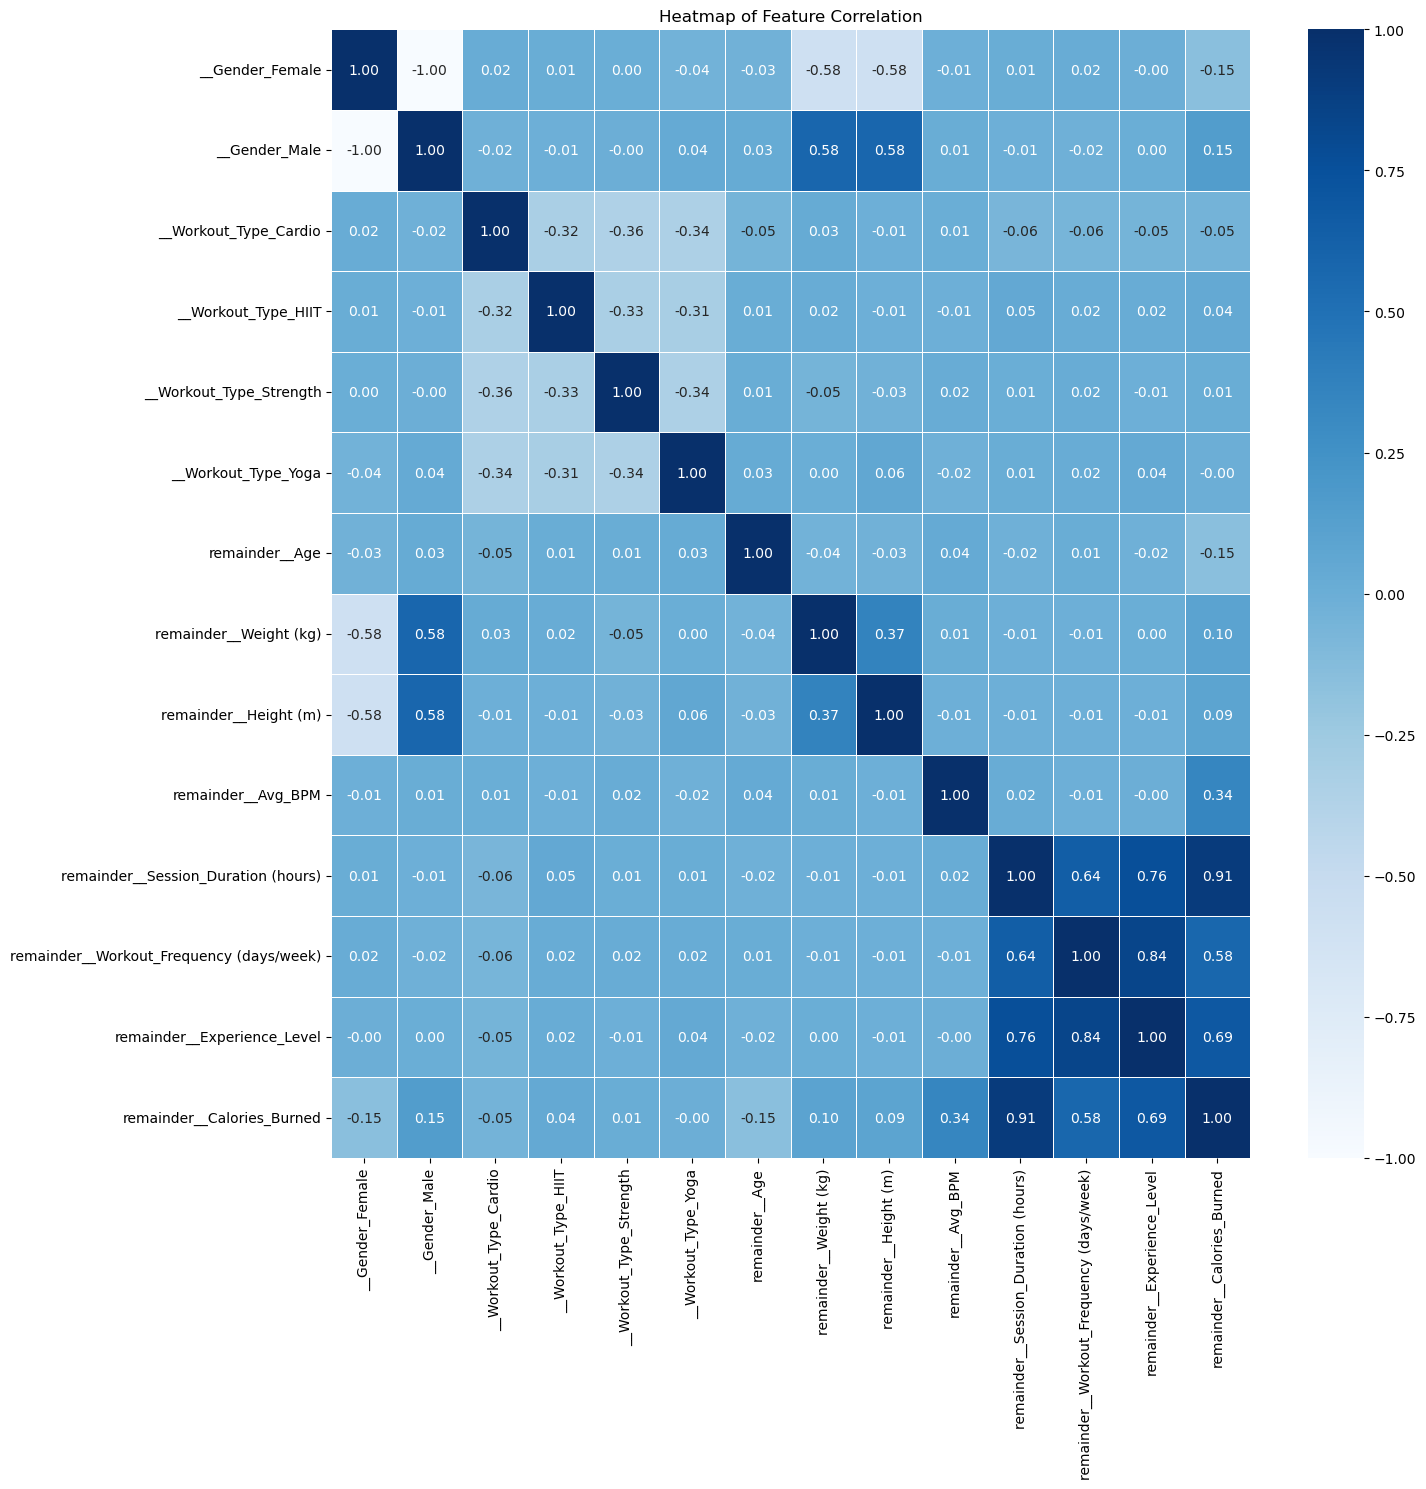

In [20]:
corr_data_df = data_df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_data_df, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5) 
plt.title("Heatmap of Feature Correlation") 
plt.tight_layout()

In [21]:
###Data splitting
print('Các biến trong mô hình')
print('Biến độc lập')
X = data_df.iloc[:,0:13].values
print(X[:5]) 

print('Biến phụ thuộc')
Y = data_df.iloc[:,13].values
print (Y [:5])

Các biến trong mô hình
Biến độc lập
[[  0.     1.     0.     0.     0.     1.    56.    88.3    1.71 157.
    1.69   4.     3.  ]
 [  1.     0.     0.     1.     0.     0.    46.    74.9    1.53 151.
    1.3    4.     2.  ]
 [  1.     0.     1.     0.     0.     0.    32.    68.1    1.66 122.
    1.11   4.     2.  ]
 [  0.     1.     0.     0.     1.     0.    25.    53.2    1.7  164.
    0.59   3.     1.  ]
 [  0.     1.     0.     0.     1.     0.    38.    46.1    1.79 158.
    0.64   3.     1.  ]]
Biến phụ thuộc
[1313.  883.  677.  532.  556.]


In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print (X [:5])

[[-0.95084677  0.95084677 -0.59594732 -0.54210975 -0.60069889  1.7524639
   1.42234256  0.6814925  -0.09854471  0.92297044  1.26459826  0.74329509
   1.60978416]
 [ 1.05169416 -1.05169416 -0.59594732  1.84464493 -0.60069889 -0.57062517
   0.60096485  0.04931563 -1.50860357  0.50449409  0.12709832  0.74329509
   0.25717623]
 [ 1.05169416 -1.05169416  1.67800068 -0.54210975 -0.60069889 -0.57062517
  -0.54896396 -0.27149054 -0.49022773 -1.51814158 -0.42706833  0.74329509
   0.25717623]
 [-0.95084677  0.95084677 -0.59594732 -0.54210975  1.66472755 -0.57062517
  -1.12392836 -0.97443347 -0.17688131  1.41119284 -1.94373492 -0.35250206
  -1.09543171]
 [-0.95084677  0.95084677 -0.59594732 -0.54210975  1.66472755 -0.57062517
  -0.05613733 -1.30939286  0.52814812  0.9927165  -1.79790159 -0.35250206
  -1.09543171]]


In [23]:
###Logistic regression

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Kết quả từng tổ hợp:
                                     params  mean_test_score  std_test_score
0   {'max_depth': None, 'n_estimators': 50}         -2139.79          110.51
1  {'max_depth': None, 'n_estimators': 100}         -2062.17          165.24
2  {'max_depth': None, 'n_estimators': 200}         -2021.12          165.04
3     {'max_depth': 10, 'n_estimators': 50}         -2131.62          101.39
4    {'max_depth': 10, 'n_estimators': 100}         -2047.18          152.97
5    {'max_depth': 10, 'n_estimators': 200}         -2021.61          155.05
6     {'max_depth': 20, 'n_estimators': 50}         -2139.79          110.51
7    {'max_depth': 20, 'n_estimators': 100}         -2062.17          165.24
8    {'max_depth': 20, 'n_estimators': 200}         -2021.12          165.04
Tham số tốt nhất: {'max_depth': None, 'n_estimators': 200}
MSE trung bình tốt nhất: 2021.1221036257236
R² score: 0.97761179167015
Mean Absolute Error (MAE): 32.27105128205128
Mean Squared Error (MSE): 43.21732

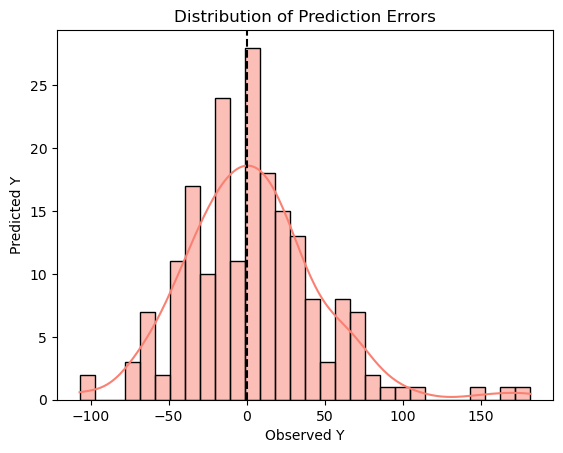

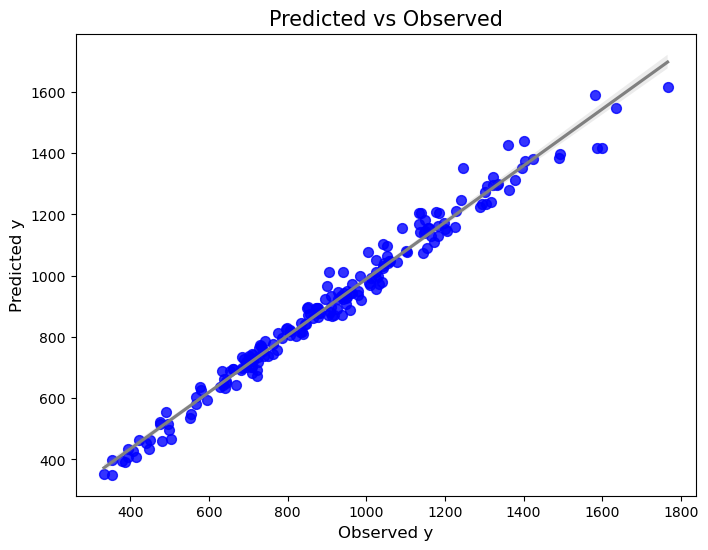

In [27]:
###Random tree forest
###Model training
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Tập hợp các giá trị tham số cần thử
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}

# Khởi tạo Random Forest
rf = RandomForestRegressor(random_state=42)

# GridSearchCV với K-Fold (cv=5)
grid_rf = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_rf.fit(X_train, Y_train)

# In kết quả
print ('Kết quả từng tổ hợp:')
df = pd.DataFrame(grid_rf.cv_results_)
print(df[['params', 'mean_test_score', 'std_test_score']])
           
print("Tham số tốt nhất:", grid_rf.best_params_)
print("MSE trung bình tốt nhất:", -grid_rf.best_score_)

# Mô hình tốt nhất sau khi tìm được tham số tối ưu
best_model_rf = grid_rf.best_estimator_

# Dự đoán trên tập test
Y_pred_rf = best_model_rf.predict(X_test)

##Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

###R2 score
r2_rf = r2_score(Y_test, Y_pred_rf)
print("R² score:", r2_rf)

####MAE
mae_rf = mean_absolute_error(Y_test, Y_pred_rf)
print(f'Mean Absolute Error (MAE): {mae_rf}')

####RMSE
rmse_rf = np.sqrt(mean_squared_error(Y_test, Y_pred_rf))
print(f'Mean Squared Error (MSE): {rmse_rf}')

# Tính sai số
errors_rf = Y_test - Y_pred_rf

# Vẽ biểu đồ phân phối sai số
sns.histplot(errors_rf, kde=True, bins=30, color='salmon')
plt.title("Distribution of Prediction Errors")
plt.xlabel("Observed Y")
plt.ylabel("Predicted Y")
plt.axvline(x=0, color='black', linestyle='--')  # đường ở giữa

data_rf = pd.DataFrame({'Observed y': Y_test, 'Predicted y': Y_pred_rf})

# Vẽ biểu đồ Predicted vs Observed
plt.figure(figsize=(8, 6))
sns.regplot(x='Observed y', y='Predicted y', data=data_rf, scatter_kws={'s': 50, 'color': 'blue'}, line_kws={'color': 'gray'})
plt.title('Predicted vs Observed', fontsize=15)
plt.xlabel('Observed y', fontsize=12)
plt.ylabel('Predicted y', fontsize=12)
plt.show()

In [ ]:
###Gradient Boosting
###Model training
from sklearn.ensemble import GradientBoostingRegressor

# Tập hợp các giá trị tham số cần thử
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'learning_rate': [0.1, 0.3, 0.5]
}

# Khởi tạo Random Forest
gbr = GradientBoostingRegressor(random_state=42)

# GridSearchCV với K-Fold (cv=5)
grid_gbr = GridSearchCV(gbr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_gbr.fit(X_train, Y_train)

# In kết quả
print("Kết quả từng tổ hợp:")
df = pd.DataFrame(grid_gbr.cv_results_)
print(df[['params', 'mean_test_score', 'std_test_score']])        
print("Tham số tốt nhất:", grid_gbr.best_params_)
print("MSE trung bình tốt nhất:", -grid_gbr.best_score_)

# Mô hình tốt nhất sau khi tìm được tham số tối ưu
best_model_gbr = grid_gbr.best_estimator_

# Dự đoán trên tập test
Y_pred_gbr = best_model_gbr.predict(X_test)

###R2 score
r2_gbr = r2_score(Y_test, Y_pred_gbr)
print("R² score:", r2_gbr)

####MAE
mae_gbr = mean_absolute_error(Y_test, Y_pred_gbr)
print(f'Mean Absolute Error (MAE): {mae_gbr}')

####RMSE
rmse_gbr =np.sqrt(mean_squared_error(Y_test, Y_pred_gbr))
print(f'Mean Squared Error (RMSE): {rmse_gbr}')

##Biểu đồ phân phối sai số
data_gbr = pd.DataFrame({'Observed y': Y_test, 'Predicted y': Y_pred_gbr})

# Vẽ biểu đồ Predicted vs Observed
plt.figure(figsize=(8, 6))
sns.regplot(x='Observed y', y='Predicted y', data=data_gbr, scatter_kws={'s': 50, 'color': 'blue'}, line_kws={'color': 'gray'})
plt.title('Predicted vs Observed', fontsize=15)
plt.xlabel('Observed y', fontsize=12)
plt.ylabel('Predicted y', fontsize=12)